In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Step 1: Read the Fashion MNIST dataset
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Step 2: Preprocess the data and display a sample
X = fashion_mnist.data
y = fashion_mnist.target

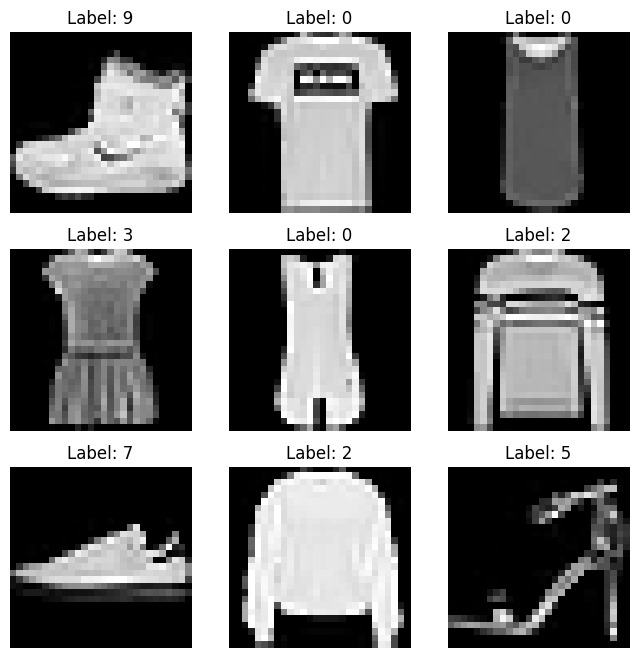

In [4]:
# Step 2: Preprocess the data
# Display a sample of the data
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y[i]}')
plt.show()

In [5]:
# Step 3: Normalize the data and convert the matrix
X = X / 255.0  # Normalize the pixel values (0-255) to range 0-1
X = X.reshape((-1, 28*28))  # Reshape the matrix to (1, 784)

In [6]:
# Step 4: Separate training and test data with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Train the linear classification model
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [8]:
y_pred_trainm = model.predict(X_train)
accuracy_trainm = accuracy_score(y_train, y_pred_trainm)
y_pred_testm = model.predict(X_test)
accuracy_testm = accuracy_score(y_test, y_pred_testm)
print(f'Training accuracy with model: {accuracy_trainm:.4f}')
print(f'Testing accuracy with model: {accuracy_testm:.4f}')

Training accuracy with model: 0.8595
Testing accuracy with model: 0.8423


In [9]:
# Step 6: Cross-validation on the training data
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
average_error = 1 - np.mean(scores)
print(f'Average cross-validation error: {average_error:.4f}')

Average cross-validation error: 0.1573


In [10]:
# Step 7: Hyperparameter tuning
# In this example, we'll adjust the learning rate and regularization parameter
learning_rates = [0.01, 0.1, 1.0]
regularization_params = [0.0001, 0.001, 0.01]
best_error = float("inf")
best_learning_rate = None
best_reg_param = None

for lr in learning_rates:
    for reg_param in regularization_params:
        model = SGDClassifier(learning_rate="constant", eta0=lr, alpha=reg_param, random_state=42)
        model.fit(X_train, y_train)
        scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
        error = 1 - np.mean(scores)
        if error < best_error:
            best_error = error
            best_learning_rate = lr
            best_reg_param = reg_param


In [11]:
# Step 8: Accuracy and correctness with the best model
best_model = SGDClassifier(learning_rate="constant", eta0=best_learning_rate, alpha=best_reg_param, random_state=42)
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Training accuracy with best model: {accuracy_train:.4f}')
print(f'Testing accuracy with best model: {accuracy_test:.4f}')



Training accuracy with best model: 0.8513
Testing accuracy with best model: 0.8425


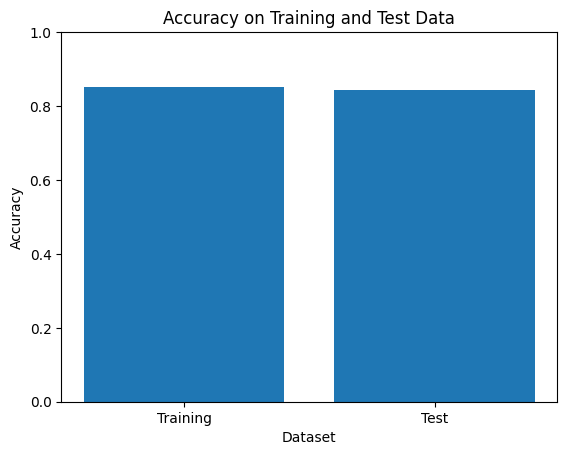

In [12]:
# Step 9: Plot accuracy values for training and test data
plt.bar(['Training', 'Test'], [accuracy_train, accuracy_test])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy on Training and Test Data')
plt.show()